# Training Model for ASL Words

## Collecting Data And Splitting

To get all the data, I will loop through all the videos for all the words, and get the numpy arrays of each frame I saved during the pre-processing step

In [1]:
import numpy as np
import os

### Collecting The Data

In [2]:
num_words = 3
num_videos = 100
start_frames = 5
end_frames = 75
videos_base_dir = 'video_data'

Above, I defined to start getting the frames starting from the 5th frame. This is because I found out that the cv2 module keeps recording videos even when I put a waitKey(2000) to wait 2 seconds to get into position for each video. I was not able to find any solutions or reasons why this is happening. So, I will instead just disregard the first 5 frames of each video.

In [3]:
def collect_data(words_to_collect=3, videos_per_word=100, start_frame=0, end_frame=75):
    data = []
    labels = []
    for words in range(words_to_collect):
        for videos in range(videos_per_word):
            video_array_list = []
            for frames in range(start_frame, end_frame):
                numpy_array_file_path = os.path.join(videos_base_dir,f'{words}',f'{videos}', 'landmarks', f'{words}_{videos}_{frames}.npy')
                temp_array = np.load(numpy_array_file_path)
                #print(f'Loading {numpy_array_file_path}')
                video_array_list.append(temp_array)
            data.append(video_array_list)
            labels.append(words)
    return data,labels
        

To check if this worked, I will print the shape of the data and labels and also look at some of the data arrays

In [4]:
data, labels = collect_data(words_to_collect=num_words, videos_per_word=num_videos, start_frame=start_frames, end_frame=end_frames)

In [5]:
data_np = np.array(data)
print(f'Shape of data: {data_np.shape}')

labels_np = np.array(labels)
print(f'Shape of labels: {labels_np.shape}')

Shape of data: (300, 70, 1662)
Shape of labels: (300,)


The shape seems right. I will do check the data to make sure everything was converted correctly

In [6]:
for word in range(num_words):
    for video in range(num_videos):
        for frame in range(start_frames, end_frames):
            if np.sum(data_np[video + (word*100)][frame-5] != np.load(os.path.join(videos_base_dir,f'{word}',f'{video}', 'landmarks', f'{word}_{video}_{frame}.npy'))):
                print(f'Error at {word}, {video}, {frame}')

In [7]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


So this means all of the data was loaded successfully

### Randomly Splitting The Data

The next step is randomizing this data and then splitting it into 3 sections. Training data, Validation data, and Testing data.

In [8]:
rng = np.random.RandomState(113)
data_indices = np.arange(len(data))
#print(data_indices)
rng.shuffle(data_indices)

In [9]:
print(data_indices)

[151  79 268 198 177   6  92 269  34  12 233 144 175 259  32  33  40 231
 255  96 132  21  71 181  19  22 152 146  35 115 142 154 156 157 148 117
 272 133  62 141   3  56 143  63 221 147 182 210 145 260  46 298 294 257
 174  43 124  29 126 171  16  25  80  30  41  91 106  26 114 108  93  20
 158 120   0 119 212 219 134 299  44 168  82 229 234   5 105 286 129 247
 285 297 125  17  68 178  81 137 155 275   9 203  86  39  28 209 238 187
 251 192 250  94 195   8  78 283  24 236 256  42 131 226 169 123 293 190
 227 196 204 109  14 262  59 202  50  57 225  66 176 241 217   2 113  18
 200 159 166 264 103  13  51  84  58 107 237 140   4 121  48 104 111 205
  60 271 163 161  45 265  27 191 127 180  77  65 248 201  72  37 295  61
 110 130  98  53  99 223 214  75 232  10  54 164 128 179  90 292  52 188
 270 136 135 197 289  38 224 101  89 138 242 208 207 243 211 170 273 100
 239 263 206 118  49  15  76 216 153 194 291 112 235 172 160  87 290 193
  88  83 122 184 278 246  31 139 186  70 296 287 10

Now I have a randomized indices array. I can split this array into 3, and then get the data at these indices for each section. The split will be 70% training, 15% validation, and 15% testing

- 70% of 300 is 210
- 15% of 300 is 45

In [10]:
train_indices = data_indices[0:210]
val_indices = data_indices[210:255]
test_indices = data_indices[255:300]

In [11]:
x_train = data_np[train_indices]
y_train = labels_np[train_indices]

x_val = data_np[val_indices]
y_val = labels_np[val_indices]

x_test = data_np[test_indices]
y_test = labels_np[test_indices]

I will do some quick manual checks by looking at the randomized indices that were generated

In [12]:
print(x_train[5][5] == np.load('video_data/0/6/landmarks/0_6_10.npy'))
print(y_train[5])

[ True  True  True ...  True  True  True]
0


In [13]:
print(x_val[41][15] == np.load('video_data/2/82/landmarks/2_82_20.npy'))
print(y_val[41])


[ True  True  True ...  True  True  True]
2


In [14]:
print(x_test[44][50] == np.load('video_data/1/65/landmarks/1_65_55.npy'))
print(y_test[44])

[ True  True  True ...  True  True  True]
1


Ok it seems like the random shuffling has worked

## Creating And Training The Model

Now that I have training, testing, and validation data, I will create a model, compile it, and then train it using this data. Then I will run some predictions using the testing dataset.

### Creating A Model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

2024-12-10 23:44:30.808880: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-10 23:44:30.811768: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 23:44:30.818203: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-10 23:44:30.838758: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733892270.871456   33375 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733892270.88

I will first try a simple model of two LSTM layers and 2 Dense layers.

In [30]:
model = Sequential([
    LSTM(32, return_sequences=True, activation='relu', input_shape=(70,1662)),
    LSTM(32, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

/home/hadiml/anaconda3/envs/ece5831-2024/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 70, 32)         │       216,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,435 (884.51 KB)

 Trainable params: 226,435 (884.51 KB)

 Non-trainable params: 0 (0.00 B)

Since there are more than 2 possible outputs, categorical cross-entropy is used

In [32]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

This also means I will need to one-hot encode the labels

In [19]:
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)
y_test_cat = to_categorical(y_test)

In [20]:
print(type(y_train_cat))
print(y_train_cat.shape)

<class 'numpy.ndarray'>
(210, 3)


In [21]:
print(type(y_val_cat))
print(y_val_cat.shape)

<class 'numpy.ndarray'>
(45, 3)


In [22]:
print(type(y_test_cat))
print(y_test_cat.shape)

<class 'numpy.ndarray'>
(45, 3)


In [23]:
type(x_train)

numpy.ndarray

In [24]:
type(model)

keras.src.models.sequential.Sequential

In [33]:
history = model.fit(x_train, y_train_cat, epochs=50, batch_size=32, validation_data=(x_val, y_val_cat))

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.2958 - loss: 1.2188 - val_accuracy: 0.2889 - val_loss: 1.0639
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.3752 - loss: 1.0261 - val_accuracy: 0.2222 - val_loss: 1.2126
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4481 - loss: 1.0472 - val_accuracy: 0.7556 - val_loss: 0.9623
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6409 - loss: 0.9879 - val_accuracy: 0.5778 - val_loss: 0.9680
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5870 - loss: 0.9513 - val_accuracy: 0.6667 - val_loss: 0.8442
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6017 - loss: 0.8325 - val_accuracy: 0.5778 - val_loss: 0.7826
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.3593 - loss: 1.2075 - val_accuracy: 0.4444 - val_loss: 1.0072
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3747 - loss: 1.1287 - val_accuracy: 0.7556 - val_loss: 0.9805

In [34]:
import matplotlib.pyplot as plt

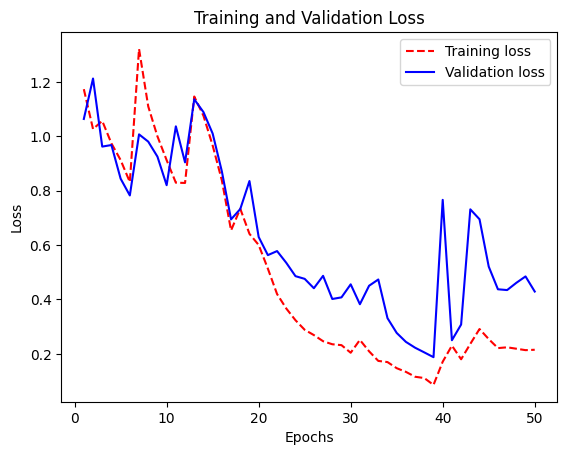

In [35]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r--", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

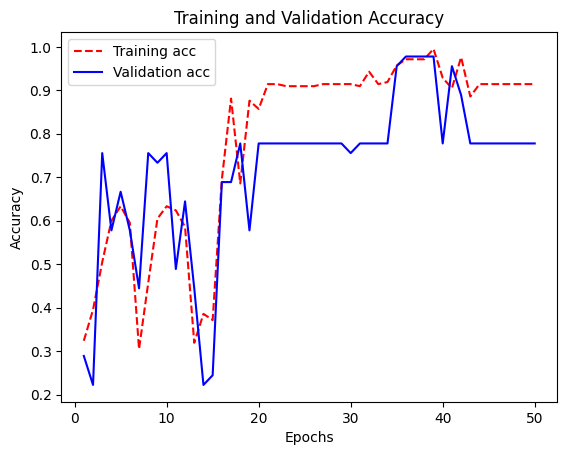

In [36]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "r--", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Based on these graphs, there is slight overfitting, and this model should only be trained for about 43 epochs.

In [37]:
model.evaluate(x_test, to_categorical(y_test))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8590 - loss: 0.2609


[0.24987250566482544, 0.8666666746139526]

So, the model currently has 90% accuracy on the training data, and 86.6% accuracy on the testing data.

__Note__: This was just to confirm that this dataset is of good enough quality that a model can train from. Once I add more data, I will more finely tune the final model

This means the model is working. Next step is to save this model so it can be used in other applications, such as in real-time using a web-cam to live-translate some sign language words

In [38]:
model.save(filepath='asl_words_model_87acc.keras')

Another example of testing one video

In [39]:
np.argmax(model.predict(x_test[0].reshape((1,70,1662))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step


1

This means the model predicted that this video is for the second word: __drink__

To check, I will get the index for the first video in the testing dataset

In [40]:
print(test_indices[0])

173


This means that the video in the first index of the testing dataset is the 73rd video of the second word: __drink__. Since each word is 100 videos with 0-99 being for the word __book__, 100-199 for the word __drink__, and 200-299 for the word __computer__

Now I will put this in a class and use it that way instead

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.utils import to_categorical

2024-12-11 19:30:15.159387: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 19:30:15.160661: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-11 19:30:15.164289: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-11 19:30:15.173431: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733963415.187992   35428 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733963415.19

In [2]:
class Training_ASL():
    num_videos = 100
    videos_base_dir = 'video_data'

    def __init__(self, start_frames=5, end_frames=75, num_words=5):
        self.num_words = num_words
        self.start_frames = start_frames
        self.end_frames = end_frames

        self._load_data()

    def _load_data(self, videos_per_word=100, start_frame=5, end_frame=75):
        data = []
        labels = []
        for words in range(self.num_words):
            for videos in range(videos_per_word):
                video_array_list = []
                for frames in range(start_frame, end_frame):
                    numpy_array_file_path = os.path.join(self.videos_base_dir,f'{words}',f'{videos}', 'landmarks', f'{words}_{videos}_{frames}.npy')
                    temp_array = np.load(numpy_array_file_path)
                    #print(f'Loading {numpy_array_file_path}')
                    video_array_list.append(temp_array)
                data.append(video_array_list)
                labels.append(words)
        self.data_np = np.array(data)
        print(f'Shape of data: {self.data_np.shape}')

        self.labels_np = np.array(labels)
        print(f'Shape of labels: {self.labels_np.shape}')
    
    def random_split_prepare_data(self, train_split=0.7, val_split=0.15, test_split=0.15, rng_seed=113):
        rng = np.random.RandomState(rng_seed)
        data_indices = np.arange(len(self.data_np))
        #print(data_indices)
        rng.shuffle(data_indices)

        train_split_max = int(train_split * len(self.data_np))

        val_split_max = int(train_split_max + (len(self.data_np) * val_split))

        test_split_max = int(val_split_max + (len(self.data_np) * test_split))

        train_indices = data_indices[0:train_split_max]
        val_indices = data_indices[train_split_max:val_split_max]
        test_indices = data_indices[val_split_max:test_split_max]

        self.x_train = self.data_np[train_indices]
        self.y_train = self.labels_np[train_indices]

        self.x_val = self.data_np[val_indices]
        self.y_val = self.labels_np[val_indices]

        self.x_test = self.data_np[test_indices]
        self.y_test = self.labels_np[test_indices]

        self.y_train = to_categorical(self.y_train)
        self.y_val = to_categorical(self.y_val)
        self.y_test = to_categorical(self.y_test)

    def build_model(self):
        self.model = Sequential([
            LSTM(32, return_sequences=True, activation='relu', input_shape=(70,1662)),
            LSTM(32, return_sequences=False),
            Dense(32, activation='relu'),
            Dense(self.num_words, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        self.model.summary()

    def train(self):
        self.history = self.model.fit(self.x_train, self.y_train, epochs=100, batch_size=128, validation_data=(self.x_val, self.y_val))

    def plot_loss(self):
        history_dict = self.history.history
        loss_values = history_dict["loss"]
        val_loss_values = history_dict["val_loss"]
        epochs = range(1, len(loss_values) + 1)
        plt.plot(epochs, loss_values, "r--", label="Training loss")
        plt.plot(epochs, val_loss_values, "b", label="Validation loss")
        plt.title("Training and Validation Loss")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.legend()
        plt.show()
    
    def plot_accuracy(self):
        history_dict = self.history.history
        acc = history_dict["accuracy"]
        val_acc = history_dict["val_accuracy"]
        epochs = range(1, len(acc) + 1)
        plt.plot(epochs, acc, "r--", label="Training acc")
        plt.plot(epochs, val_acc, "b", label="Validation acc")
        plt.title("Training and Validation Accuracy")
        plt.xlabel("Epochs")
        plt.ylabel("Accuracy")
        plt.legend()
        plt.show()
    
    def evaluate_test(self):
        results = self.model.evaluate(self.x_test, self.y_test)
        print(f'Loss: {results[0]}\nAccuracy: {results[1]}')

    def save_model(self, save_path='asl_words_model_2L2D.keras'):
        self.model.save(filepath=save_path)

    def predict(self, video_array, label):
        prediction = np.argmax(self.model.predict(video_array.reshape((1,70,1662))))
        if prediction == label:
            print(f'Successfully predicted {prediction}, which matches the label {label}')
        else:
            print(f'Incorrectly predicted {prediction}, but the real label is {label}')

I will test this with the new dataset that has 6 words instead of 3

In [3]:
training_class = Training_ASL(num_words=6)

Shape of data: (600, 70, 1662)
Shape of labels: (600,)


In [4]:
training_class.random_split_prepare_data()

In [5]:
training_class.build_model()

W0000 00:00:1733963422.602443   35428 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/hadiml/anaconda3/envs/ece5831-2024/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 70, 32)         │       216,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 226,534 (884.90 KB)

 Trainable params: 226,534 (884.90 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
training_class.train()

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.2139 - loss: 1.8666 - val_accuracy: 0.1444 - val_loss: 1.9432
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1070 - loss: 1.8785 - val_accuracy: 0.1778 - val_loss: 1.9198
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1563 - loss: 1.8346 - val_accuracy: 0.1778 - val_loss: 1.8902
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.1816 - loss: 1.8155 - val_accuracy: 0.0111 - val_loss: 1.8542
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 9.5238e-04 - loss: 1.8122 - val_accuracy: 0.0000e+00 - val_loss: 1.8258
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.0053 - loss: 1.8020 - val_accuracy: 0.1667 - val_loss: 1.8042
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.1671 - loss: 1.7926 - val_accuracy: 0.1778 - val_loss: 1.7921
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.2089 - loss: 1.7879 - val_accuracy: 0.2889 - 

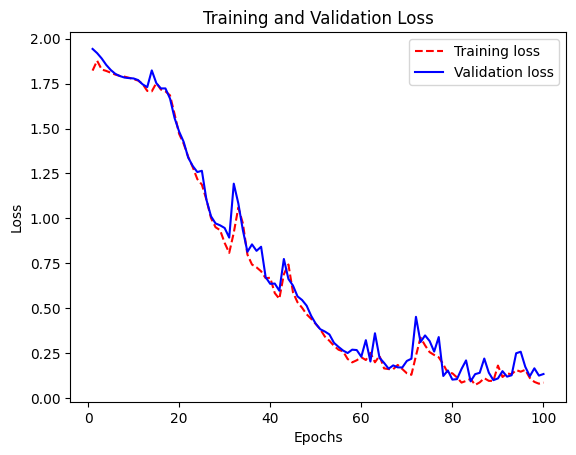

In [7]:
training_class.plot_loss()

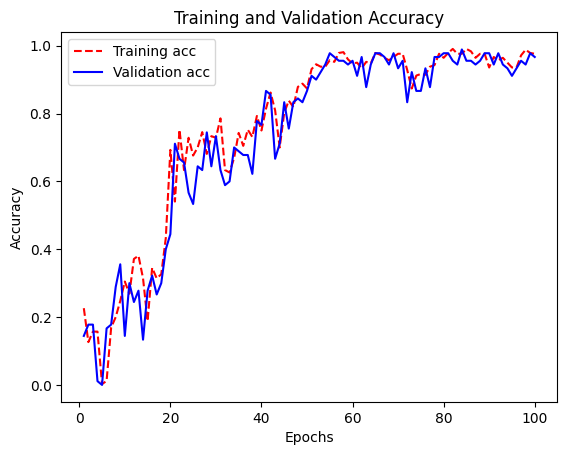

In [8]:
training_class.plot_accuracy()

While the training is not a constant trajectory, it is clear that the model eventually reaches high accuracy levels

In [9]:
training_class.evaluate_test()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9677 - loss: 0.1395
Loss: 0.1394069939851761
Accuracy: 0.9666666388511658


In [10]:
training_class.save_model('asl_words_6words_2L32_2D32_6_epoch100_batch128_96acc.keras')

For the next 5 words I made, I will use those to test the training.py script

In [1]:
import training

2024-12-13 15:01:13.820818: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-13 15:01:13.821687: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 15:01:13.823851: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-13 15:01:13.829667: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734120073.840127   64568 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734120073.84

In [2]:
training_script = training.Training_ASL(num_words=11)

Shape of data: (1100, 70, 1662)
Shape of labels: (1100,)


In [3]:
training_script.random_split_prepare_data()

In [4]:
print(training_script.x_train.shape)
print(training_script.x_val.shape)
print(training_script.x_test.shape)

(770, 70, 1662)
(165, 70, 1662)
(165, 70, 1662)


In [5]:
training_script.build_model()

W0000 00:00:1734120078.548418   64568 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/hadiml/anaconda3/envs/ece5831-2024/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
training_script.model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 70, 32)         │       216,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 70, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 70, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           715 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,043 (1.39 MB)

 Trainable params: 364,043 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
training_script.train()

Epoch 1/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.0954 - loss: 2.4055 - val_accuracy: 0.1030 - val_loss: 2.3883
Epoch 2/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1227 - loss: 2.3007 - val_accuracy: 0.0606 - val_loss: 2.3922
Epoch 3/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1809 - loss: 2.1344 - val_accuracy: 0.1030 - val_loss: 1.8539
Epoch 4/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1906 - loss: 1.8122 - val_accuracy: 0.1818 - val_loss: 1.7734
Epoch 5/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.1987 - loss: 1.7764 - val_accuracy: 0.2364 - val_loss: 1.7226
Epoch 6/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2452 - loss: 1.7537 - val_accuracy: 0.1030 - val_loss: 1.7695
Epoch 7/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.2071 - loss: 1.7161 - val_accuracy: 0.1212 - val_loss: 1.7527
Epoch 8/125
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.2081 - loss: 1.7188 - val_accuracy: 0.

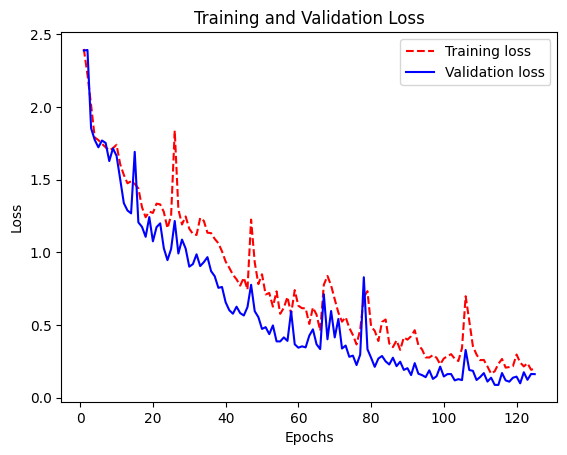

In [9]:
training_script.plot_loss()

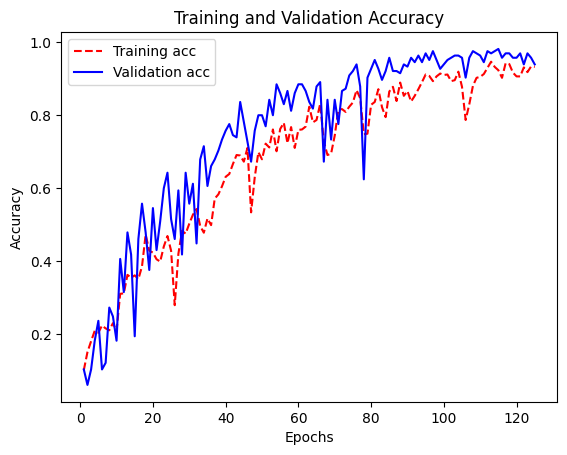

In [10]:
training_script.plot_accuracy()

In [8]:
training_script.evaluate_test()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9447 - loss: 0.1429
Loss: 0.1856573224067688
Accuracy: 0.9333333373069763


The accuracy is slightly worse now, but that is expected since there is more data, and this is complex data. However, the model still achieved 89% accuracy on the testing data so it is fine to use this model

In [11]:
import numpy as np

In [12]:
training_script.predict(training_script.x_test[0], np.argmax(training_script.y_test[0]))

ValueError: cannot reshape array of size 116340 into shape (1,55,1662)

In [13]:
training_script.save_model('asl_11words_model_4L2D_93acc.keras')